In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import pandas as pd
#import seaborn as sns

#sns.set(rc={'figure.figsize':(14, 4)})

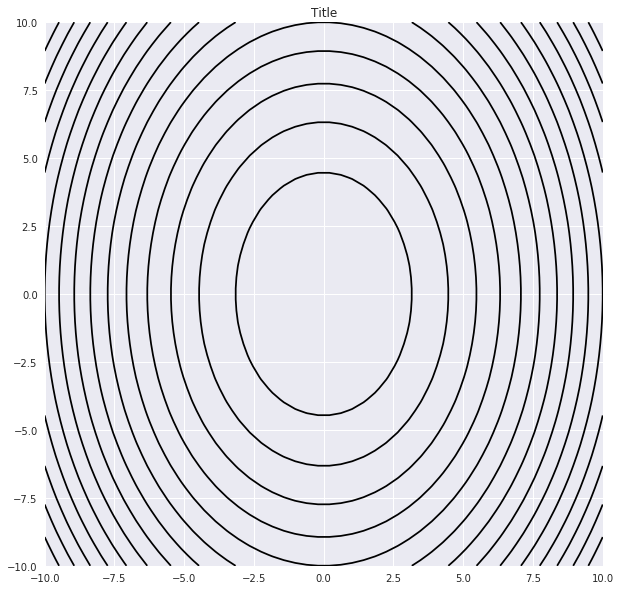

In [2]:
from plot import plot

plot(gamma=2);

In [5]:
#data = np.load('homework/data.data')
#plot(gamma=2, points=data)

In [36]:
import pandas as pd

parameters = pd.read_csv('../parameters.csv', sep=';')
parameters.head()

FileNotFoundError: File b'../parameters.csv' does not exist

In [38]:
a = None
for index, row in parameters.iterrows():
    a = row
    break
x_0, x_1, gama = a
x_0, x_1, gama

NameError: name 'parameters' is not defined

In [75]:
data = pd.read_csv('../trabalho2/results/pseudo_inverse_method.csv')
data

,f,x_0,x_1,error
0,17.525366,2.000000,6.000000,2.882840e+00
1,16.007733,3.856406,4.143594,1.546183e-02
2,16.000000,3.999954,4.000046,1.607205e-09
3,16.000000,4.000000,4.000000,-1.332268e-15


Text(0.5,0,'k')

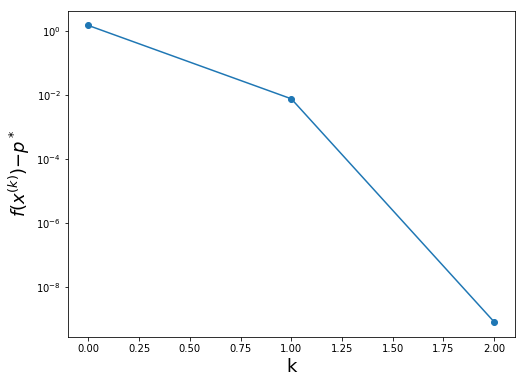

In [84]:
ponto_otimo = data.iloc[-1]
taxa_erro_ponto_otimo = (data - ponto_otimo)

ax = taxa_erro_ponto_otimo[:-1].f.plot.line(marker='o', logy=True, title='', figsize=(8,6))

ax.yaxis.offsetText.set_fontsize(24)

ax.set_ylabel('$f(x^{(k)}) − p^*$', fontsize=18)
ax.set_xlabel('k', fontsize=18)

Text(0.5,0,'k')

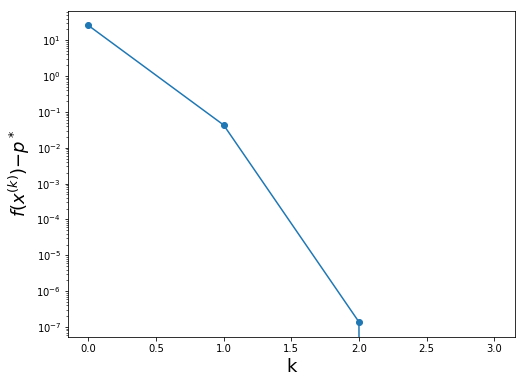

In [147]:
data = pd.read_csv('../trabalho2/results/pseudo_inverse_method-ConstrainedNewtonInfeasible-BacktrackingLineSearchInfeasible.csv')

ponto_otimo = data.iloc[-1]
taxa_erro_ponto_otimo = (data - ponto_otimo)

ax = taxa_erro_ponto_otimo[:-1].f.plot.line(marker='o', logy=True, title='', figsize=(8,6))

ax.yaxis.offsetText.set_fontsize(24)

ax.set_ylabel('$f(x^{(k)}) − p^*$', fontsize=18)
ax.set_xlabel('k', fontsize=18)


Perceba que a linha no ponto $k=2$ desce em linha reta para a marcação no eixo x.
Isto ocorre que entre o passo $k=2$ encontrou a mesma solução de $k=3$ ($f(x^{(2)}) = f(x^{(3)}) = 0$),
sendo exibido desta

In [87]:
import numpy as np
from numpy.linalg import pinv, inv

A = np.array([[1, 1]])
x = np.array([[2, 6]]).T
b = np.array([[8]])

x = pinv(A) @ b

A = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
])
np.random.seed(42)
x = np.random.randint(low=10, high=100, size=(4, 1))
b = A@x
b
x.shape

np.allclose([86985.99979068371], [86985.99979068377])

np.where([False, True], [12,4])

ValueError: either both or neither of x and y should be given

In [57]:
data[['method', 'line_search']].drop_duplicates()

KeyError: "['method' 'line_search'] not in index"

In [17]:
from collections import OrderedDict

filter_method = lambda method, line_search: data[(data['method'] == method) & (data['line_search'] == line_search)]

executions_backtracking = OrderedDict()
executions_backtracking['Gradiente descendente'] = filter_method('GradientDescent', 'backtracking')
executions_backtracking['Descida mais íngreme'] = filter_method('SteepestDescent', 'backtracking')
executions_backtracking['Newton'] = filter_method('Newton', 'backtracking')


executions_backtracking['Gradiente descendente'].head()

,method,line_search,id_parameter,alpha,beta,step,x_0,x_1,error
12,GradientDescent,backtracking,0,0.01,0.01,0,-0.600327,-0.272469,3.693544
13,GradientDescent,backtracking,0,0.01,0.01,1,-0.564307,-0.264295,3.477441
14,GradientDescent,backtracking,0,0.01,0.01,2,-0.530449,-0.256366,3.274300
15,GradientDescent,backtracking,0,0.01,0.01,3,-0.498622,-0.248675,3.083343
16,GradientDescent,backtracking,0,0.01,0.01,4,-0.468704,-0.241215,2.903839


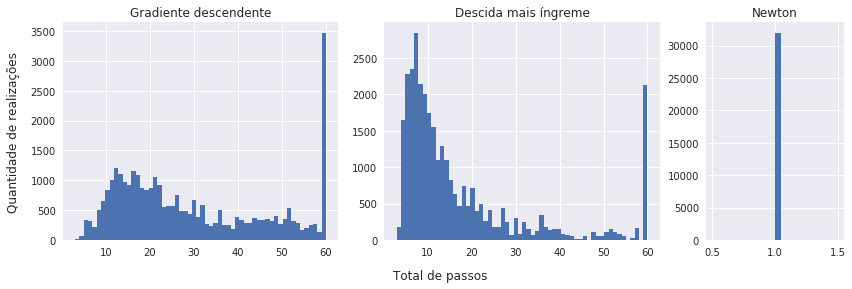

In [158]:
def histogramas(methods):
    fig, axes = plt.subplots(ncols=3, gridspec_kw = {'width_ratios':[2, 2, 1]})
    #fig.suptitle('Total de passos necessários', fontsize=16)
    
    fig.text(0.5, -0.01, 'Total de passos', ha='center')
    fig.text(0.07, 0.5, 'Quantidade de realizações', va='center', rotation='vertical')
    
    for method, ax in zip(methods.items(), axes):
        name, data = method

        group_by = data.groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()
        #group_by = group_by[group_by['step'] < 60]

        steps = group_by.sort_values('step')['step'] - 1
        
        total_bars = steps.max() - steps.min() + 1
        total_bars = total_bars if total_bars > 1 else 20

        steps.plot.hist(total_bars, ax=ax, title=name)
        ax.set_ylabel("")

sns.set(rc={'figure.figsize':(14, 4)})
histogramas(executions_backtracking)

count    32000.000000
mean        29.618688
std         17.181069
min          3.000000
25%         15.000000
50%         24.000000
75%         44.000000
max         60.000000
Name: step, dtype: float64
count    32000.000000
mean        17.319719
std         15.640333
min          3.000000
25%          7.000000
50%         11.000000
75%         20.000000
max         60.000000
Name: step, dtype: float64


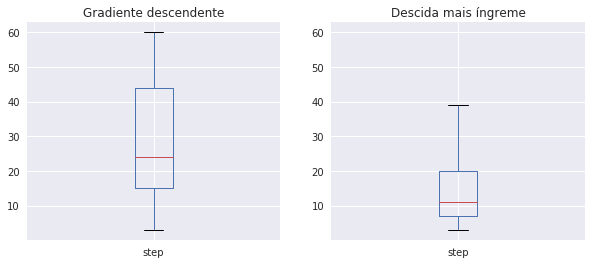

In [152]:
sns.set(rc={'figure.figsize':(10, 4)})

fig, axes = plt.subplots(ncols=2)

for method, ax in zip(executions_backtracking.items(), axes):
    name, data = method
    steps = data \
        .groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']) \
        .count() - 1# \
        #.sort_values('step')['step'] - 1

    ax.set_title(name)
    steps['step'].to_frame().boxplot(ax=ax)
    print(steps['step'].describe())


In [103]:
executions_backtracking['Gradiente descendente'].head(3)

,method,line_search,id_parameter,alpha,beta,step,x_0,x_1,error
12,GradientDescent,backtracking,0,0.01,0.01,0,-0.600327,-0.272469,3.693544
13,GradientDescent,backtracking,0,0.01,0.01,1,-0.564307,-0.264295,3.477441
14,GradientDescent,backtracking,0,0.01,0.01,2,-0.530449,-0.256366,3.274300


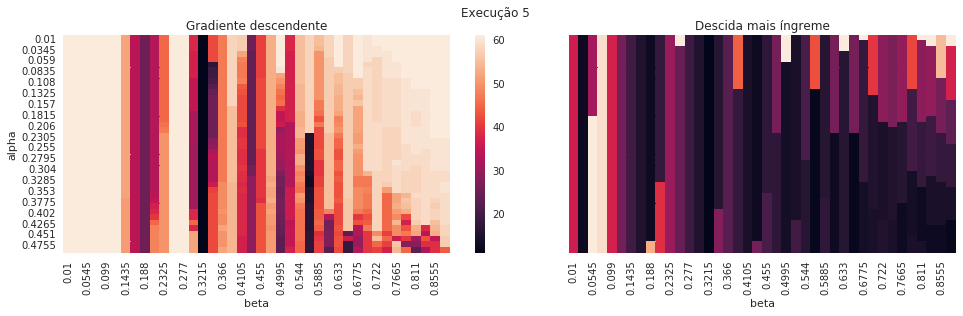

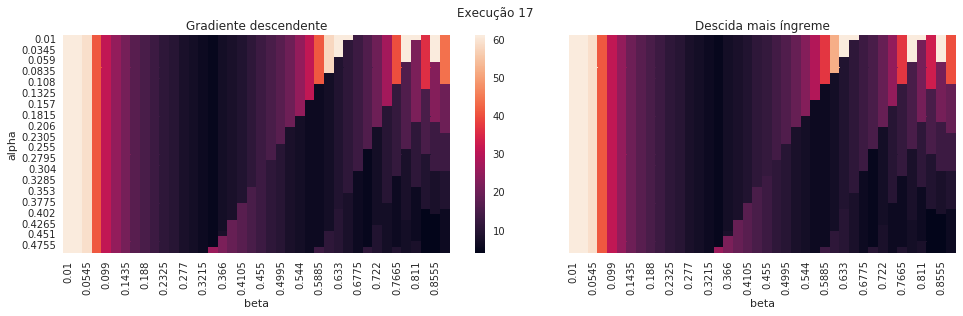

In [157]:
#sns.set(rc={'figure.figsize':(8, 3)})
sns.set(rc={'figure.figsize':(16, 4)})

def heartmaps(methods, execution):
    fig, axes = plt.subplots(ncols=2, sharey=True, gridspec_kw = {'width_ratios':[5, 4]})
    fig.suptitle('Execução {}'.format(execution+1), fontsize=12)
    
    #fig.text(0.5, -0.01, 'Execução {}'.format(execution+1), ha='center')
    #fig.text(0.07, 0.5, 'Frequência', va='center', rotation='vertical')
    
    i = 0
    for method, ax in zip(methods.items(), axes):
        i += 1
        name, data = method
        data = data.round({'alpha': 6, 'beta': 6})
        group_by = data[data['id_parameter']==execution].groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()

        a = group_by.unstack()['step']
        a = a.reset_index(['method', 'line_search', 'id_parameter'])
        
        del a['method']
        del a['line_search']
        del a['id_parameter']

        sns.heatmap(a, ax=ax, cbar=i%2 == 1)
        if i%2 == 0:
            ax.set_ylabel("")
        ax.set_title(name)
    
    plt.subplots_adjust(wspace=.05, hspace=0)

#for i in range(20):
#    heartmaps(executions_backtracking, i)

heartmaps(executions_backtracking, 4)
heartmaps(executions_backtracking, 16)

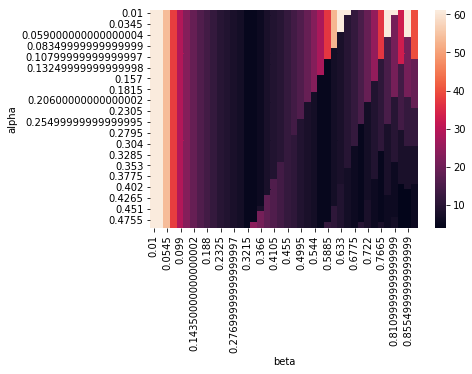

In [26]:
#group_by.sort_values('step')['step'].plot.hist(61)
#group_by[group_by['method']]
sns.heatmap(a)

In [25]:
group_by3 = filtered.groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count()
group_by3.reset_index('id_parameter').sort_values(['step', 'id_parameter'])

id_parameter  step  x_0  x_1  \
method          line_search  alpha   beta                                    
SteepestDescent backtracking 0.40200 0.83325             0     4    4    4   
                             0.41425 0.83325             0     4    4    4   
                                     0.85550             0     4    4    4   
                             0.42650 0.83325             0     4    4    4   
                                     0.85550             0     4    4    4   
                             0.43875 0.83325             0     4    4    4   
                                     0.85550             0     4    4    4   
                             0.45100 0.83325             0     4    4    4   
                                     0.85550             0     4    4    4   
                             0.46325 0.83325             0     4    4    4   
                                     0.85550             0     4    4    4   
                             0.47550 0.83325             0     4    4    4   
                                     0.85550             0     4    4    4   
                             0.48775 0.83325             0     4    4    4   
                                     0.85550             0     4    4    4   
                             0.01000 0.32150             4     4    4    4   
                             0.02225 0.32150             4     4    4    4   
                             0.03450 0.32150             4     4    4    4   
                             0.04675 0.32150             4     4    4    4   
                             0.05900 0.32150             4     4    4    4   
                             0.07125 0.32150             4     4    4    4   
                             0.08350 0.32150             4     4    4    4   
                             0.09575 0.32150             4     4    4    4   
                             0.10800 0.32150             4     4    4    4   
                             0.12025 0.32150             4     4    4    4   
                             0.13250 0.32150             4     4    4    4   
                             0.14475 0.32150             4     4    4    4   
                             0.15700 0.32150             4     4    4    4   
                             0.16925 0.32150             4     4    4    4   
                             0.18150 0.32150             4     4    4    4   
...                                                    ...   ...  ...  ...   
                             0.31625 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.32850 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.34075 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.35300 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.36525 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.37750 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.38975 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.40200 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.41425 0.01000            19    61   61   61   
                                     0.03225            19    61   61   61   
                             0.42650 0.01000            19    61   6

In [159]:
grad = executions_backtracking['Gradiente descendente']
len(grad[grad['id_parameter']==1].groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta']).count())
#30*30
1600**(1/2)

40.0

Text(0.5,0,'Total de passos')

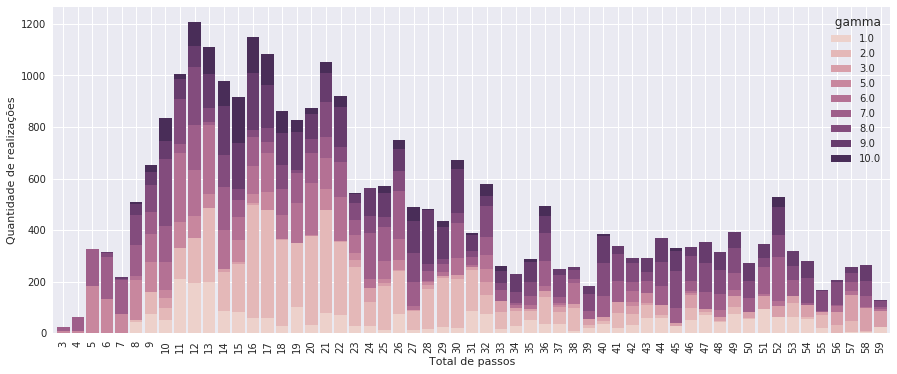

In [335]:
sns.set(rc={'figure.figsize':(15, 6)})

filtered = \
    grad.join(parameters.reset_index().rename(columns={'index': 'id_parameter'}), on='id_parameter', how='inner', rsuffix='-') \
        .groupby(['method', 'line_search', 'id_parameter', 'alpha', 'beta', ' gamma']).count() - 1
filtered = filtered \
    .groupby([' gamma', 'step']).count()

pivot_table = filtered.reset_index().pivot(index='step', columns=' gamma', values='error').fillna(0)
#pivot_table.plot(kind='bar', stacked=True, color=sns.cubehelix_palette(10))
#filtered.index < 60#['step']# < 60

axes = pivot_table[pivot_table.index < 60].plot(kind='bar', stacked=True, color=sns.cubehelix_palette(10), width=.85)
axes.set_ylabel('Quantidade de realizações')
axes.set_xlabel('Total de passos')